In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, tests_carried_out, daily_vaccinations, population_vaccinated, unique_people_tested
from heatmap import heatmap
from maps import case_maps
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
78,692 cases (7 day average) as of Tue 18 Jan, +264.1 since Mon 17 Jan
1,700 hospitalised (7 day average) as of Fri 21 Jan, -34.1 since Thu 20 Jan
217 died (7 day average) as of Tue 18 Jan, -3.7 since Mon 17 Jan


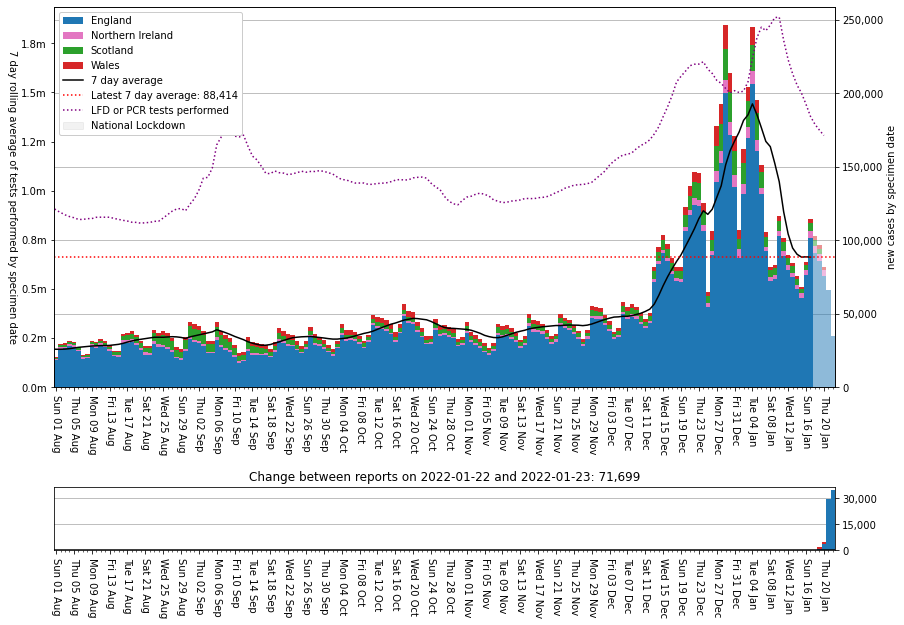

In [3]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b', earliest='2021-08', diff_ylims=None)

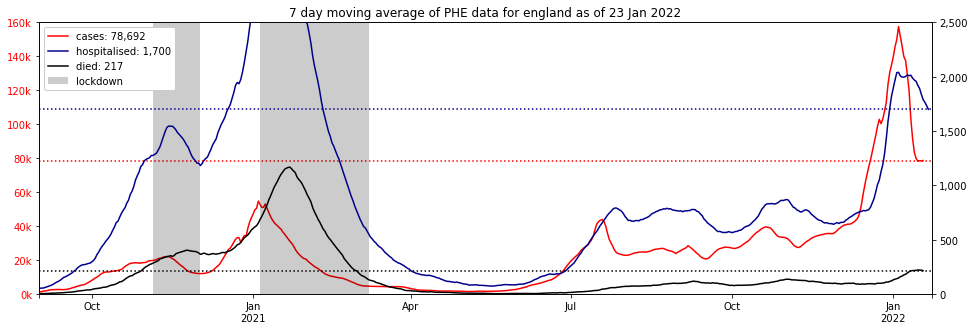

In [4]:
plot_summary(earliest_date='2020-09-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=160_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=2500)

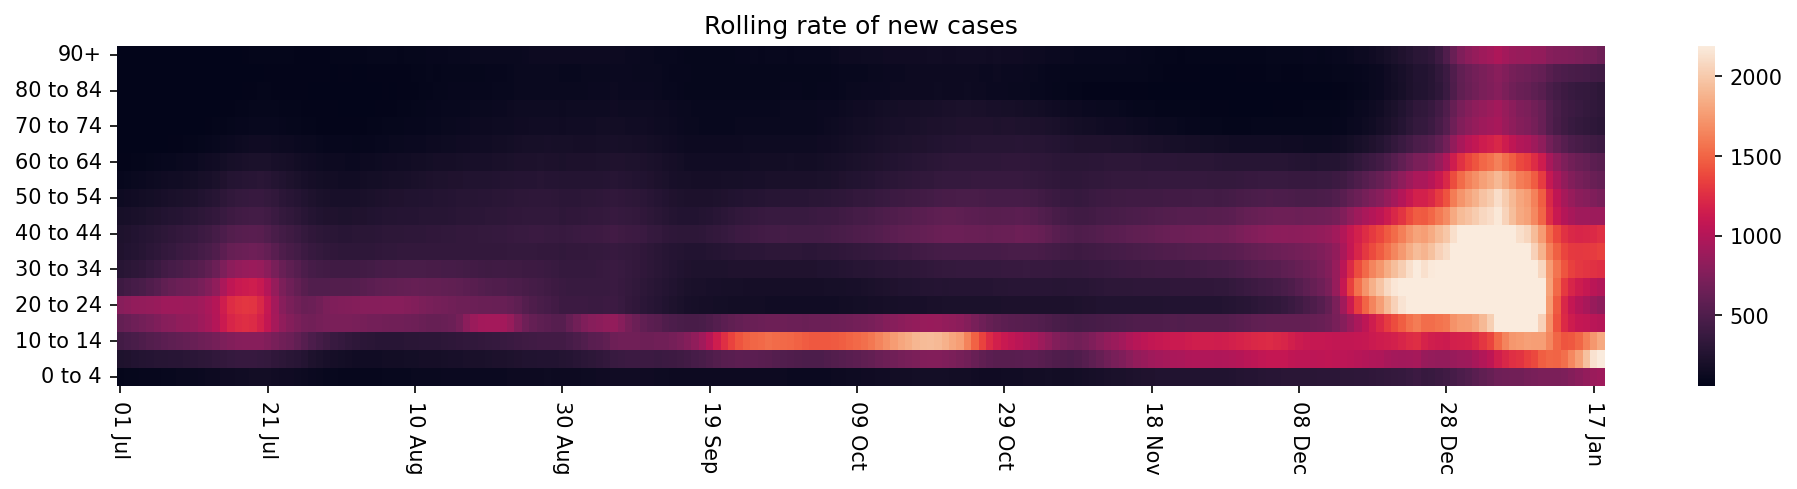

In [5]:
data = load_demographic_data('case_demographics_nation', 'England', 'rollingRate', start='2021-07')[0]
heatmap(data, title='Rolling rate of new cases', figsize=(16, 3))

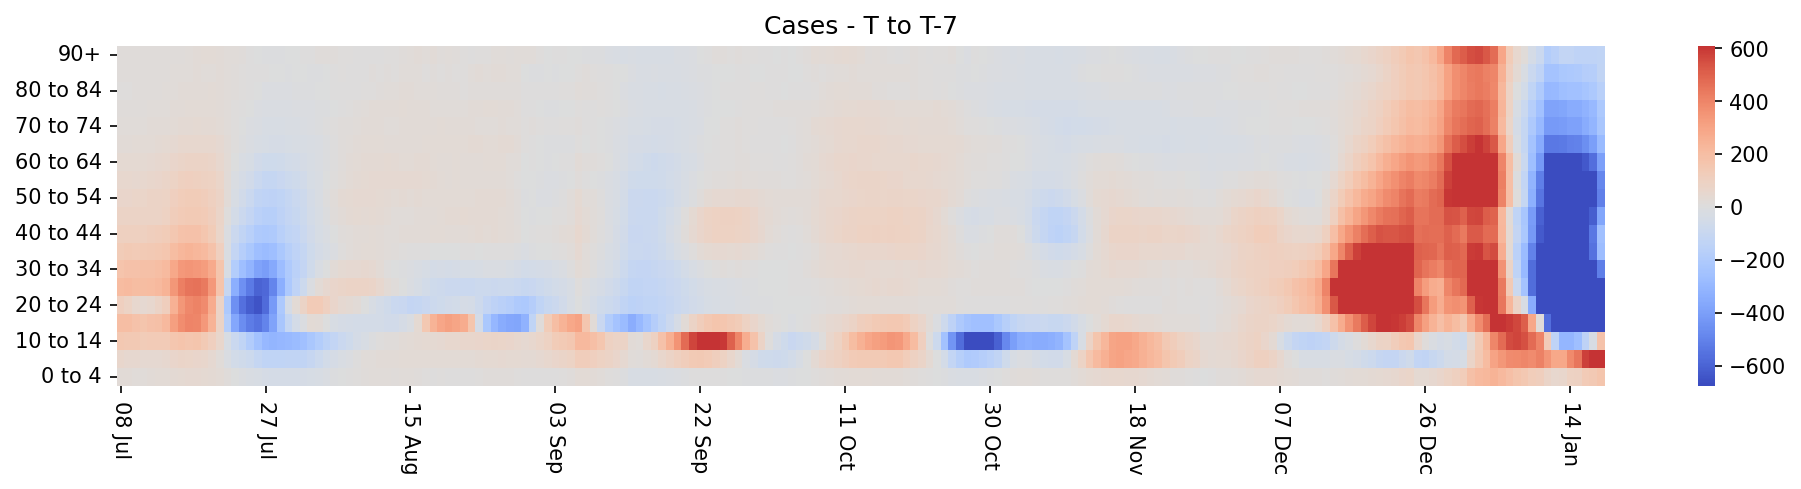

In [6]:
heatmap(diff(data, days=7), title='Cases - T to T-7', figsize=(16, 3), center=0, cmap='coolwarm')

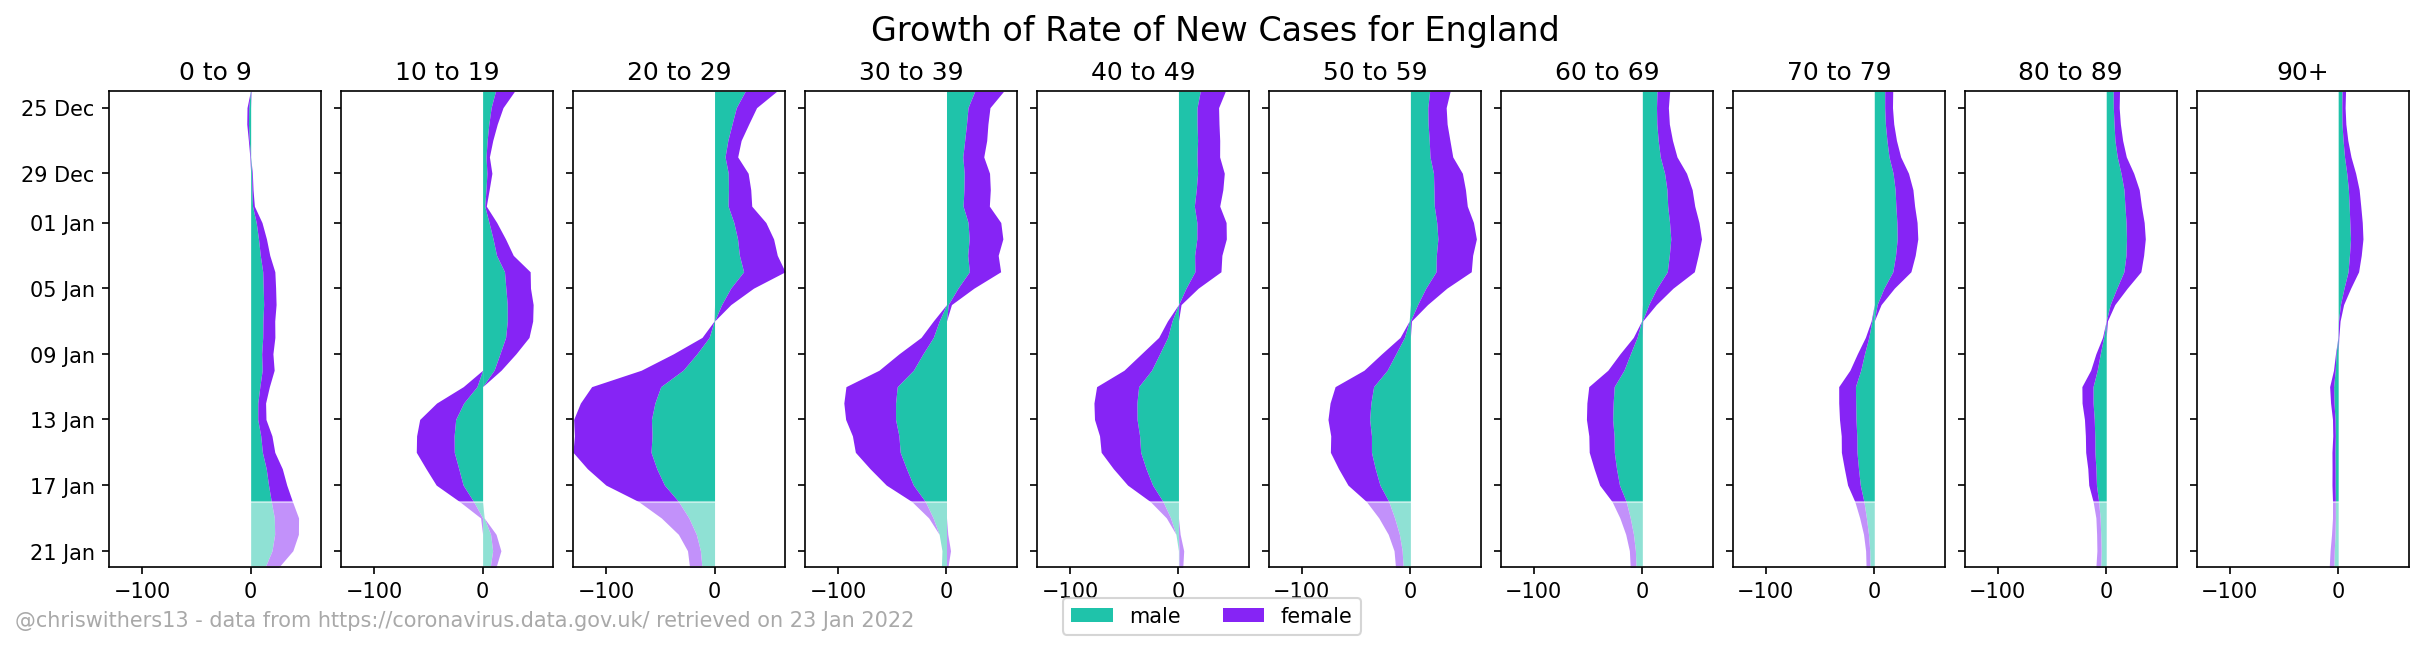

In [7]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

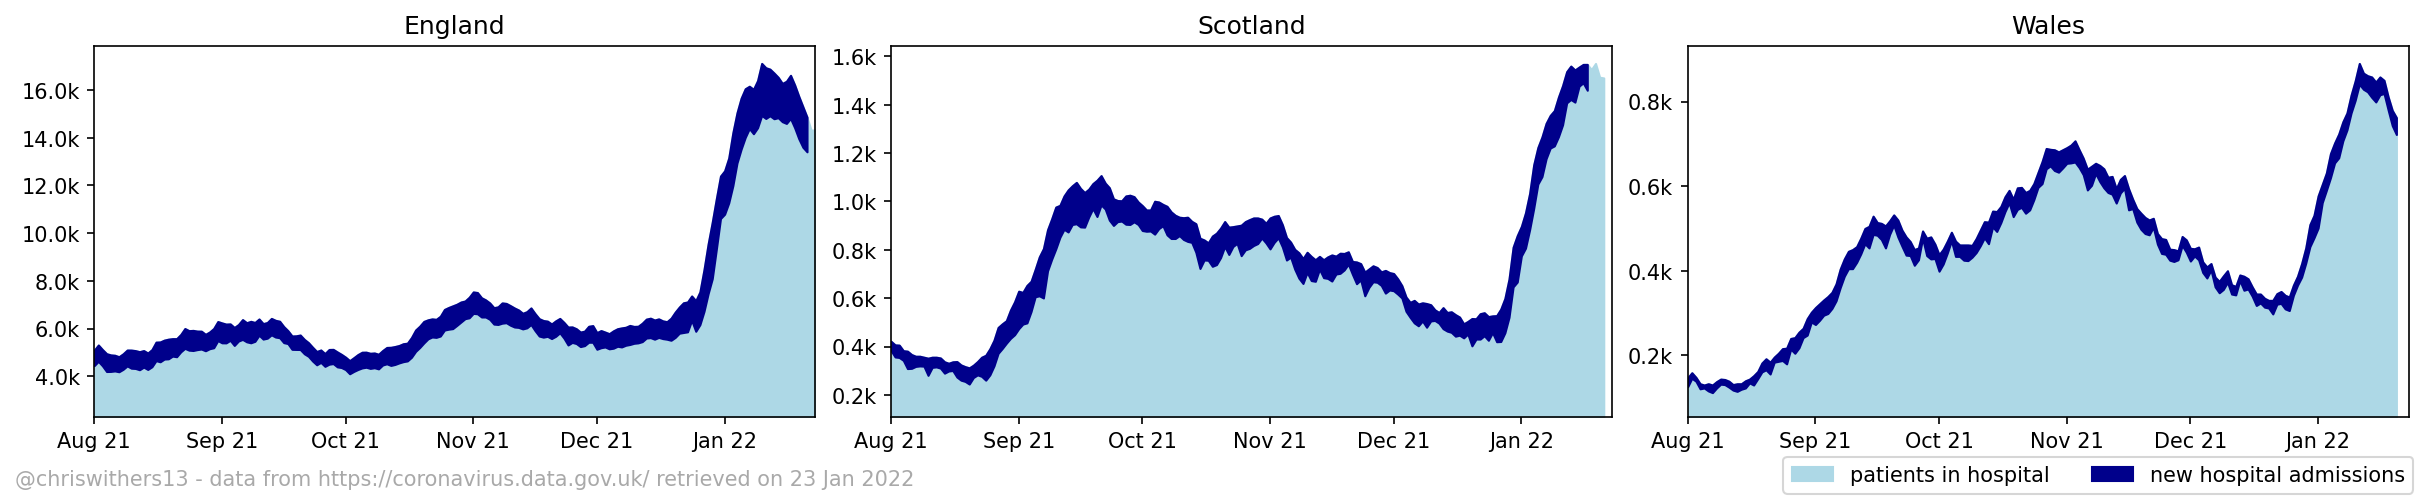

In [8]:
hospital_plot(start='2021-08', figsize=(16,3), figs=(1, 3), ymin=None)

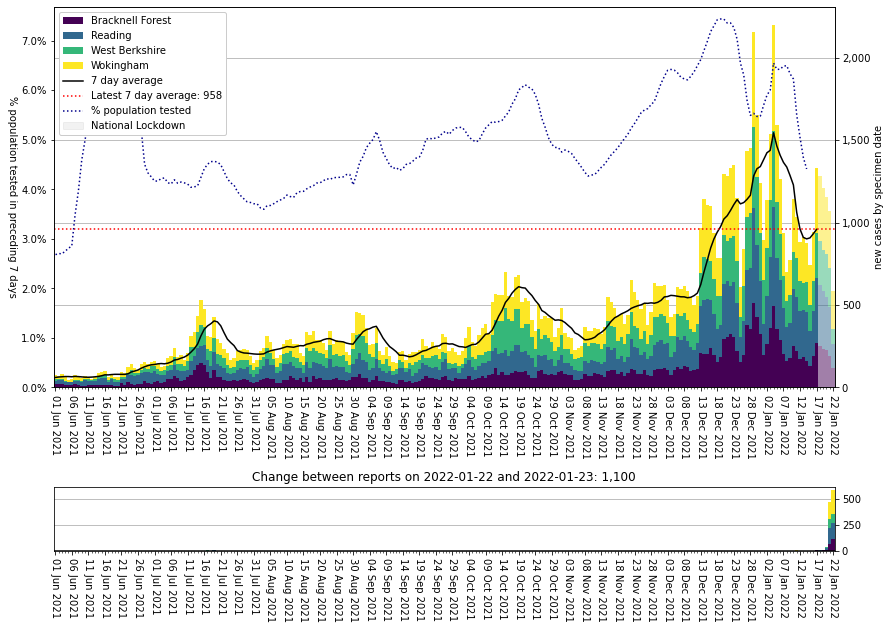

In [9]:
plot_areas(for_date, areas=my_areas, lines=unique_people_tested)

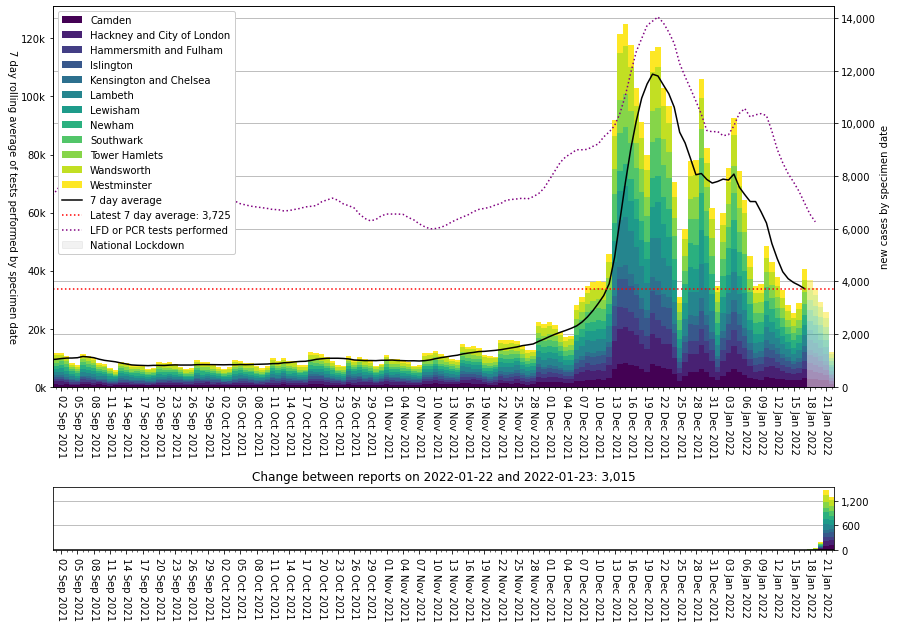

In [10]:
plot_areas(for_date, areas=london_areas, earliest='2021-09', lines=tests_carried_out)

In [11]:
data = recent_cases_summed(days=7, exclude_days=1)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                              
E06000031                          Peterborough         1766.052438   
N09000010                Newry, Mourne and Down         1716.399806   
E06000020                    Telford and Wrekin         1596.294772   
N09000002  Armagh City, Banbridge and Craigavon         1580.444486   
E06000055                               Bedford         1526.902569   
E07000008                             Cambridge         1493.613680   
E07000217                                Woking         1491.174982   
E07000154                           Northampton         1462.980277   
E07000103                               Watford         1427.876202   
E07000150                                 Corby         1413.774959   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
E06000031                  3572.0    2022-01-21  
N09000010                  3113.0    2022-01-21  
E06000020                  2871.0    2022-01-21  
N09000002                  3417.0    2022-01-21  
E06000055                  2646.0    2022-01-21  
E07000008                  1864.0    2022-01-21  
E07000217                  1503.0    2022-01-21  
E07000154                  3286.0    2022-01-21  
E07000103                  1379.0    2022-01-21  
E07000150                  1021.0    2022-01-21

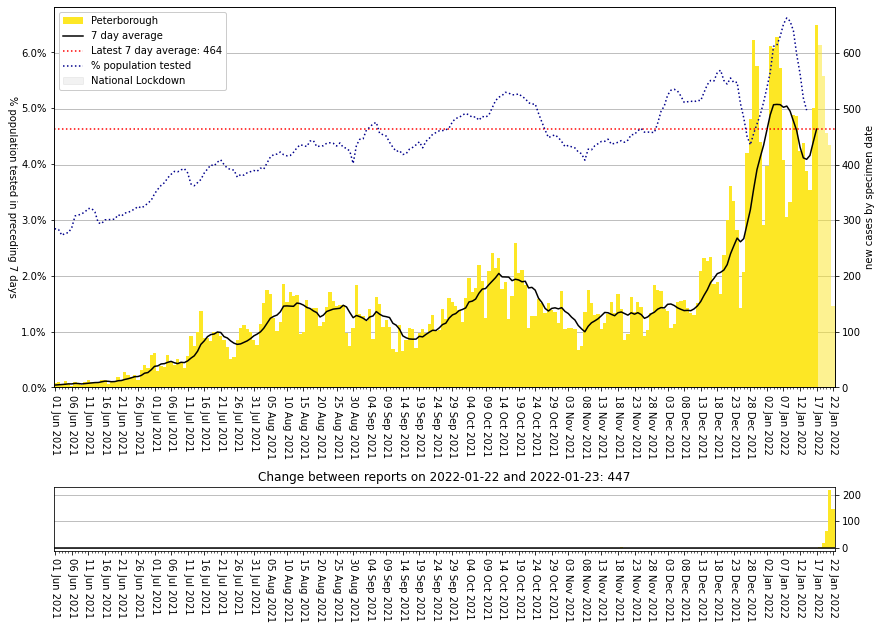

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  newCasesBySpecimenDate  \
areaCode                                                                  
E08000025        Birmingham          990.527370                 11310.0   
E08000035             Leeds         1134.605662                  8999.0   
E06000047     County Durham         1368.059250                  7252.0   
E08000032          Bradford         1194.754861                  6449.0   
E08000019         Sheffield         1018.888507                  5959.0   
E08000034          Kirklees         1078.931392                  4745.0   
E06000054         Wiltshire          900.156792                  4501.0   
E06000023  Bristol, City of          952.787903                  4415.0   
E08000003        Manchester          798.215817                  4413.0   
E09000003            Barnet         1096.827486                  4342.0   

          Specimen date  
areaCode                 
E08000025    2022-01-21  
E08000035    2022-01-21  
E06000047    2022-01-21  
E08000032    2022-01-21  
E08000019    2022-01-21  
E08000034    2022-01-21  
E06000054    2022-01-21  
E06000023    2022-01-21  
E08000003    2022-01-21  
E09000003    2022-01-21

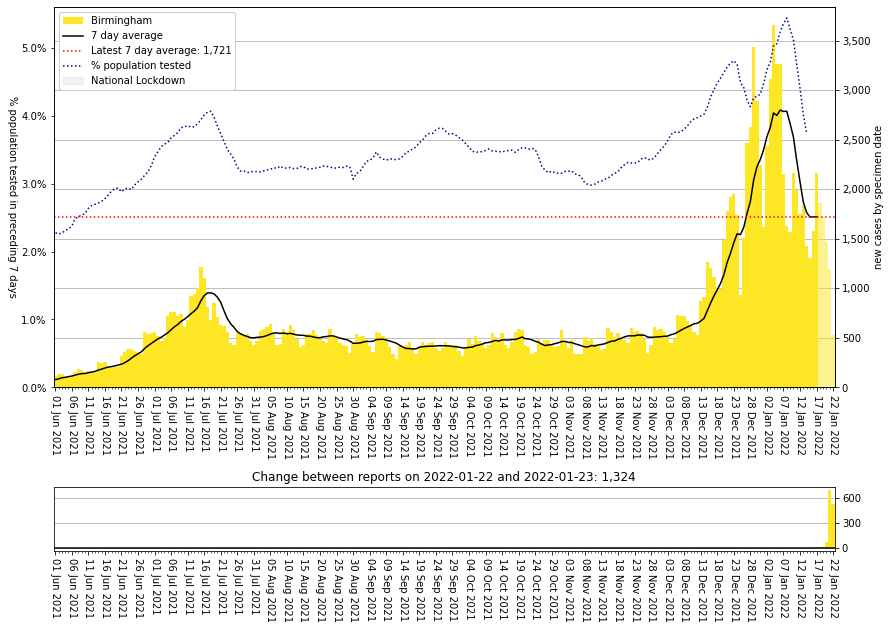

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

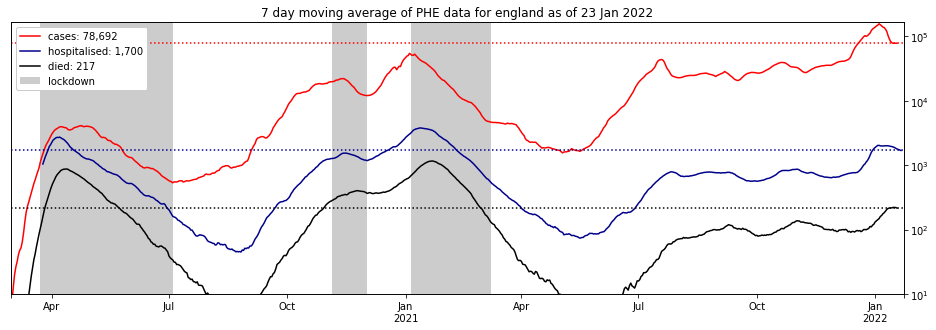

In [16]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

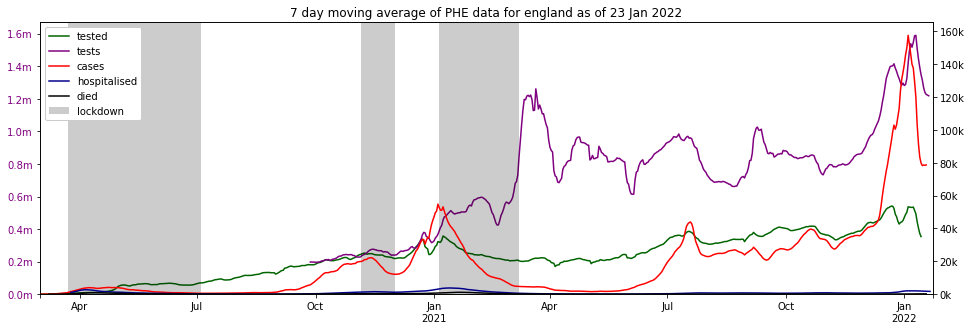

In [17]:
plot_summary(left_series=(s.unique_people_tested_sum, s.reported_virus_tests_sum), left_formatter=per1m_formatter,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

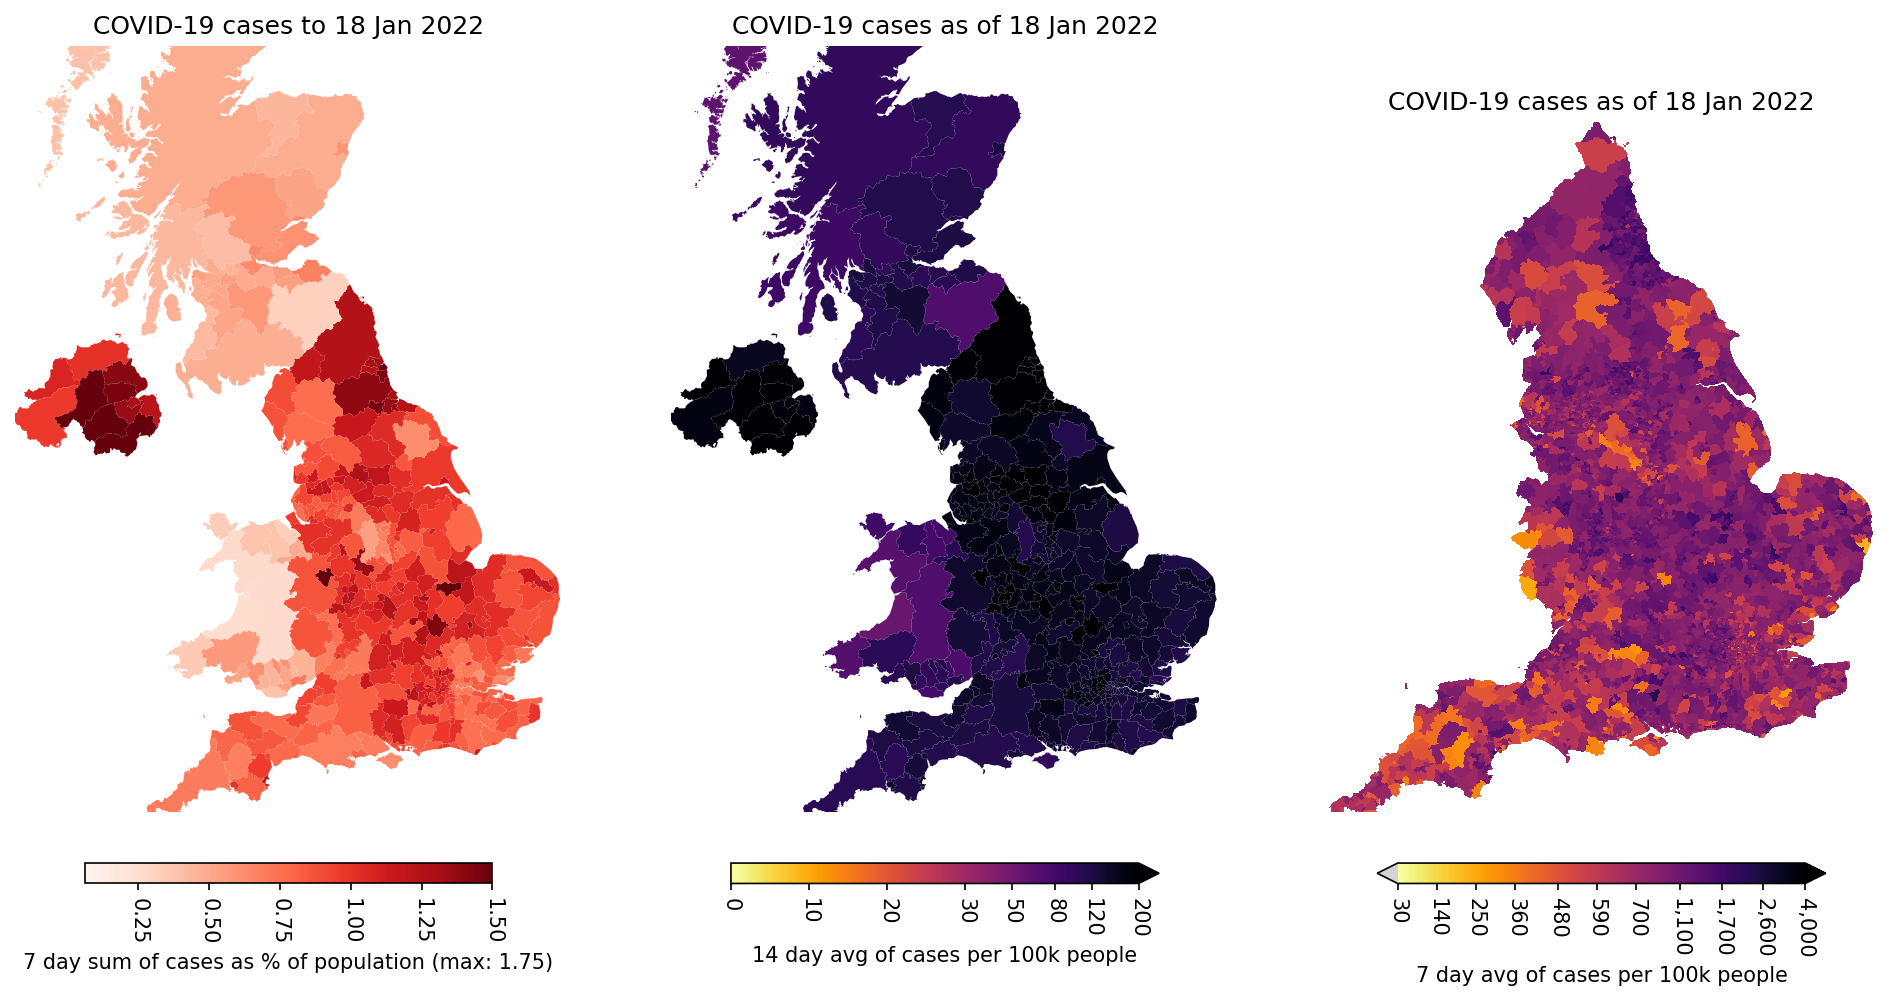

Loading BokehJS ...

In [18]:
case_maps(sum_vmax=1.5, exclude_days=4)